# Classification Algorithms

October 03,2024

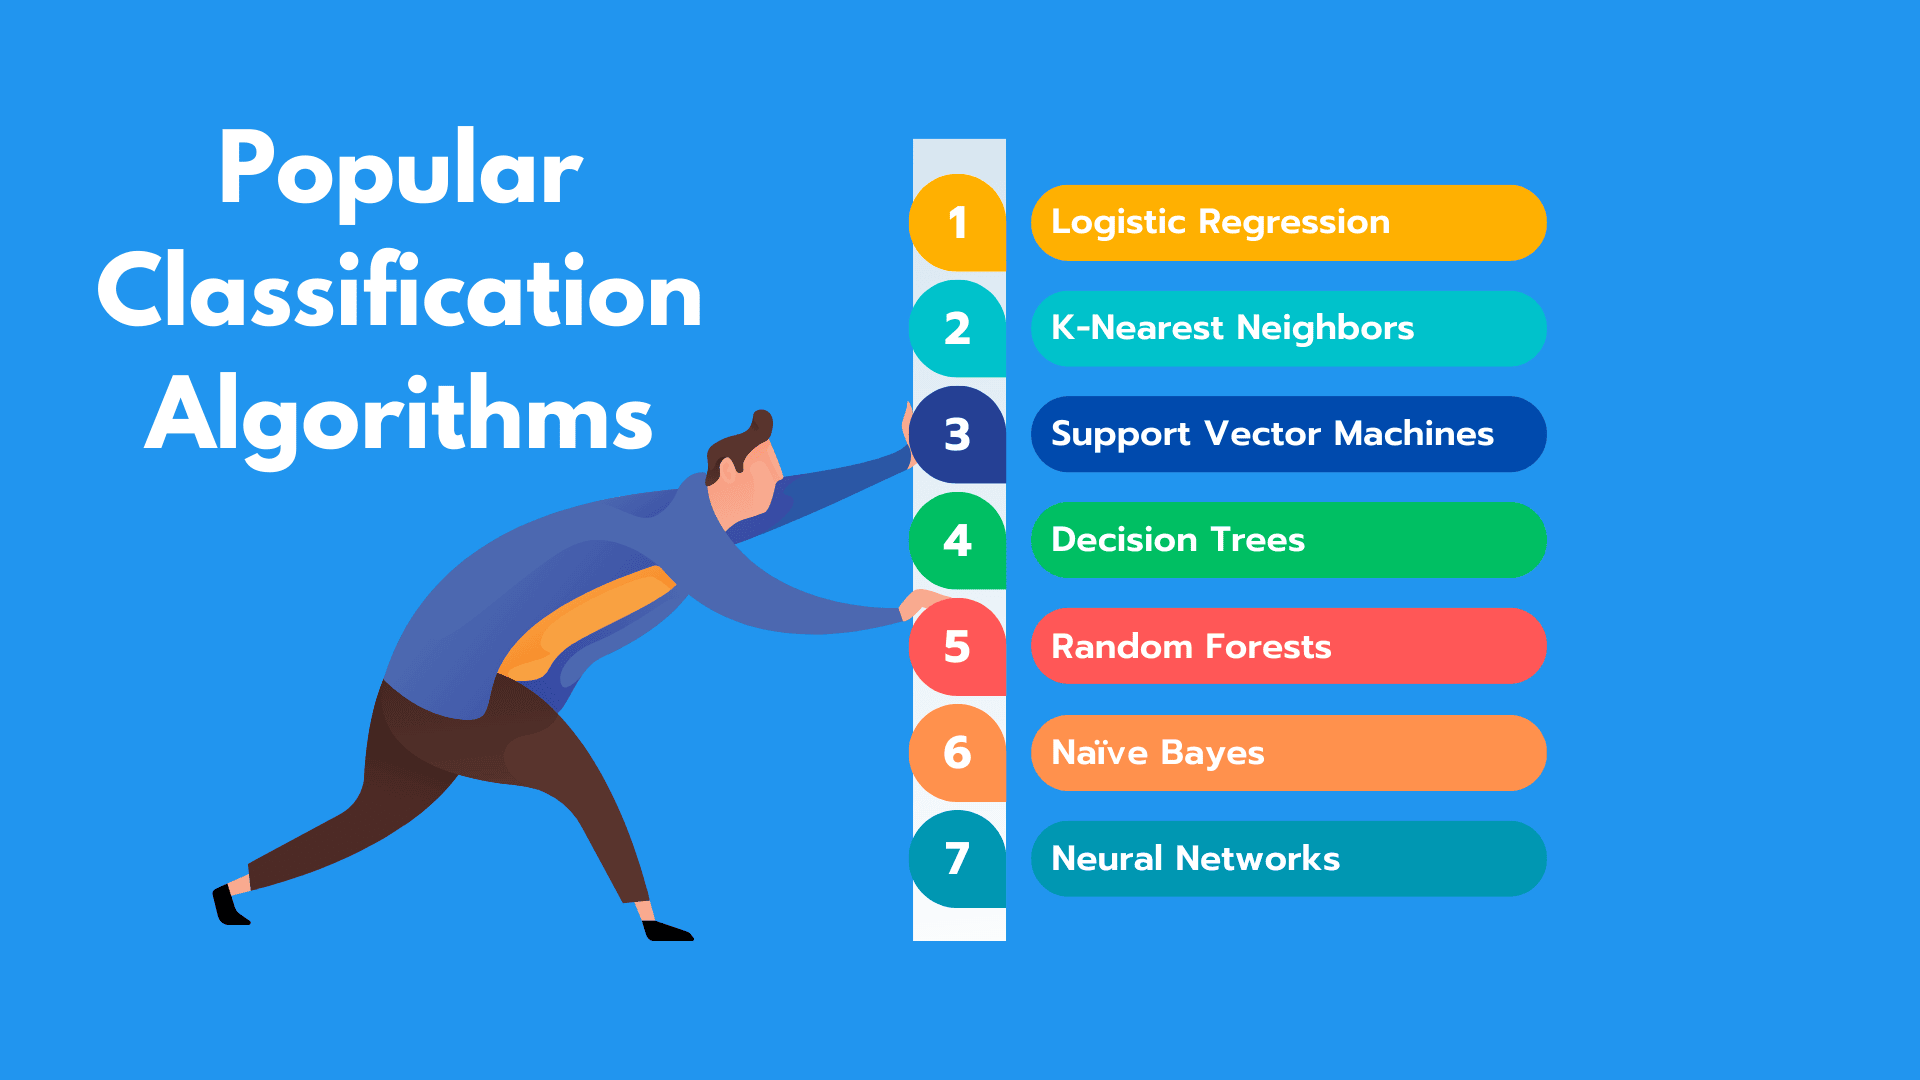

## DataSet

**Overview of the Iris Dataset**

The Iris dataset contains 150 samples of iris flowers, with each sample having four features (attributes) and belonging to one of three different classes. The dataset is named after the Iris flower and was first introduced by the British biologist and statistician Ronald A. Fisher in 1936.

**Understanding the Features and Classes**

The Iris dataset has the following features and classes:

1. **Features (Attributes)**
Each sample in the dataset is described using four numeric features:

 1. **Sepal Length (cm):** *The length of the sepal (outer part of the flower) in centimeters.*

 2. **Sepal Width (cm):** *The width of the sepal in centimeters.*

 3. **Petal Length (cm):** *The length of the petal (inner part of the flower) in centimeters.*

 4. **Petal Width (cm):** *The width of the petal in centimeters.*

These features are used to distinguish between different types of iris flowers.

2. **Classes (Labels)**

The dataset has three distinct classes of iris flowers:

 1. **Setosa (Class 0)**
  * Represented as 0 in the dataset.
  * Known for its smaller petal and sepal measurements compared to the other classes.

 2. **Versicolor (Class 1)**

  * Represented as 1 in the dataset.
  * Intermediate size between Setosa and Virginica.

 3. **Virginica (Class 2)**

  * Represented as 2 in the dataset.
  * Has the largest petal and sepal dimensions.

Each sample in the dataset is labeled with one of these three classes.

**Key Characteristics of the Iris Dataset**
* Number of Samples: 150
* Number of Features: 4
* Number of Classes: 3
* Class Distribution: 50 samples per class

The features and classes are used to build and evaluate various classification models to identify the species of a given iris flower based on its measurements.


**Why the Iris Dataset is Popular**

The Iris dataset is widely used because of its simplicity and the distinct separation between some of the classes. It provides a straightforward introduction to classification algorithms, making it suitable for beginners learning about supervised learning and classification tasks.



In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Load the Iris dataset from sklearn
iris = datasets.load_iris()

# Create a DataFrame for easier manipulation and visualization
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Add the target (species) column
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})  # Map the target to species names

# Display the first few rows of the DataFrame
df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  Setosa  
1  Setosa  
2  Setosa  
3  Setosa  
4  Setosa

### Statistics

In [2]:
# Display basic statistics of the dataset
print("\nBasic statistics of the Iris dataset:")
df.describe()



Basic statistics of the Iris dataset:


sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000

### Pairplot

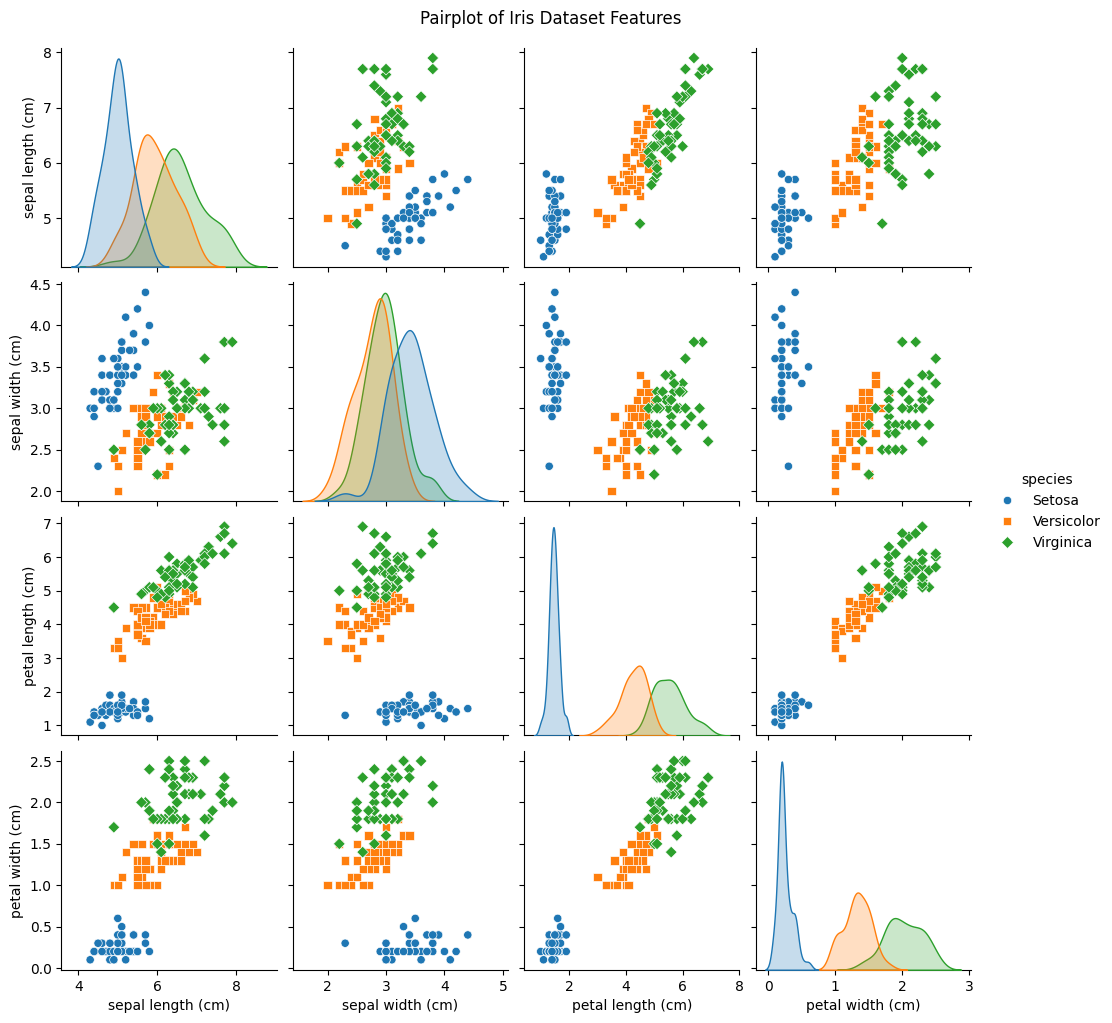

In [3]:

import warnings
warnings.filterwarnings('ignore')

# Pairplot to visualize relationships between features and species
sns.pairplot(df, hue='species', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Iris Dataset Features", y=1.02)
plt.show()

### Boxplot
To show distribution of each feature by species


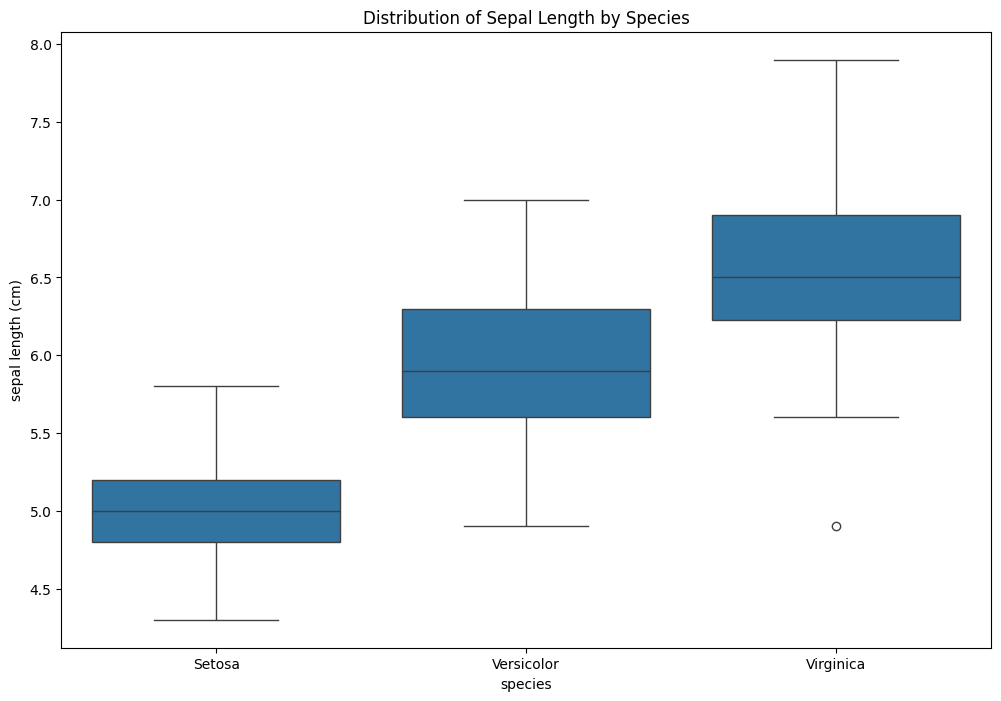

In [14]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='species', y='sepal length (cm)', data=df)
plt.title("Distribution of Sepal Length by Species")
plt.show()

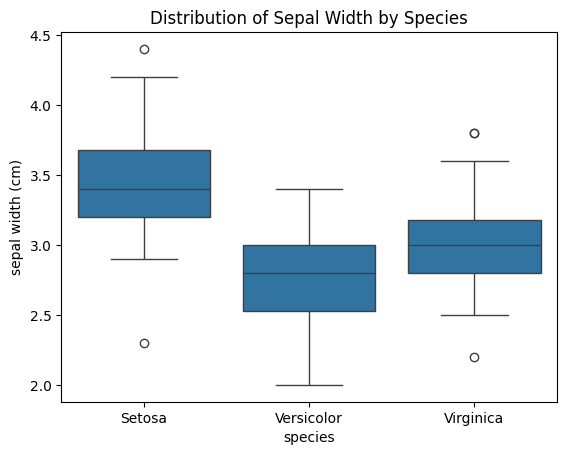

In [15]:
sns.boxplot(x='species', y='sepal width (cm)', data=df)
plt.title("Distribution of Sepal Width by Species")
plt.show()


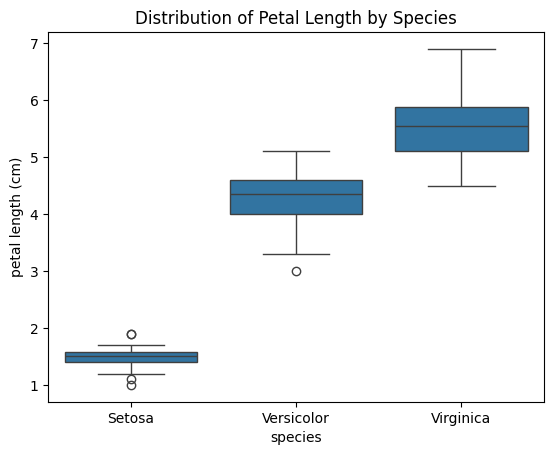

In [16]:
sns.boxplot(x='species', y='petal length (cm)', data=df)
plt.title("Distribution of Petal Length by Species")
plt.show()

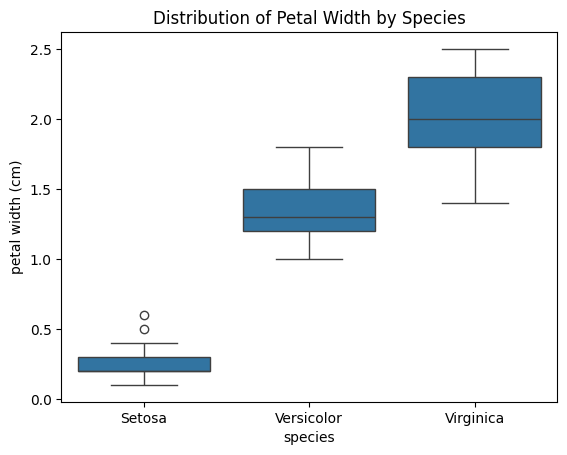

In [17]:
sns.boxplot(x='species', y='petal width (cm)', data=df)
plt.title("Distribution of Petal Width by Species")
plt.show()

## Support Vector Machine (SVM)

**Resources**

1. https://scikit-learn.org/stable/modules/svm.html [official docs]

2. https://www.analyticsvidhya.com/support-vector-machine/#:~:text=What%20is%20a%20Support%20Vector%20Machine%20(SVM)?%20It%20is%20a

4. https://towardsdatascience.com/support-vector-machine-explained-8bfef2f17e71#:~:text=Support%20Vector%20Machine%20(SVM)%20is%20probably%20one%20of%20the%20most

5. https://youtu.be/_PwhiWxHK8o?si=cTXZx86muQzUPAfq [mathematics]

6. https://towardsdatascience.com/support-vector-classifier-explained-a-visual-guide-with-mini-2d-dataset-62e831e7b9e9#:~:text=Definition.%20Support%20Vector%20Machines%20are%20supervised%20learning%20models%20used%20mainly [visual explanation]

*Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It is based on finding the hyperplane that best separates data points of different classes in a high-dimensional space.*

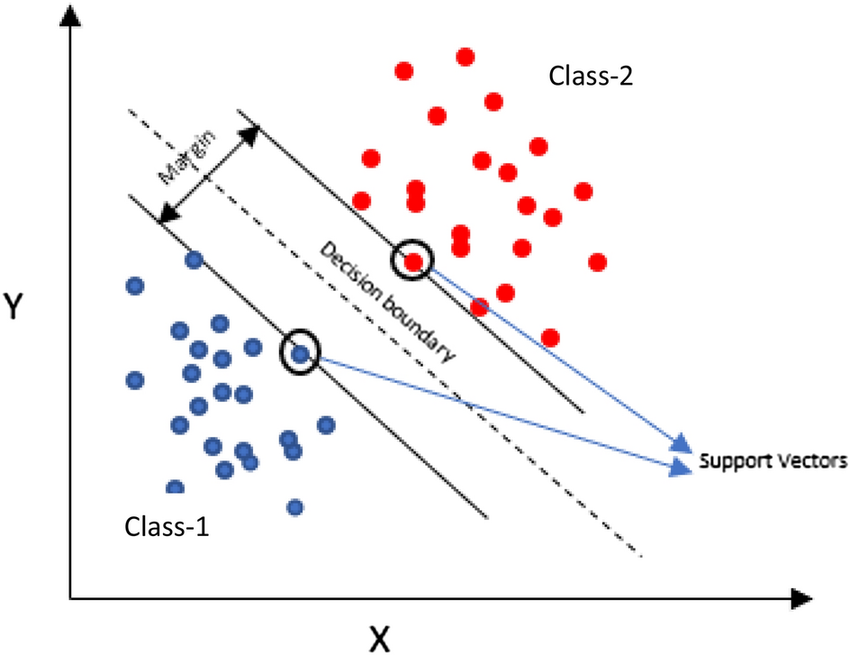

**Key Concepts of SVM:**

**Hyperplane:** A decision boundary that separates different classes in the feature space. In a two-dimensional space, it's a line; in higher dimensions, it's a plane or hyperplane.

**Support Vectors:** Data points that are closest to the hyperplane and influence its position and orientation. These points are critical for defining the optimal hyperplane.

**Margin:** The distance between the hyperplane and the nearest support vector of each class. The objective of SVM is to maximize this margin, making it a robust classifier with good generalization capabilities.

**Kernel Trick:** When data is not linearly separable in its original space, SVM can use a kernel function to project the data into a higher-dimensional space where a linear separation is possible. Common kernels include:

*   **Linear Kernel:** Suitable for linearly separable data.

*   **Polynomial Kernel:** For non-linear data with polynomial relationships.

*   **Radial Basis Function (RBF):** Works well with most non-linear datasets.

*   **Sigmoid Kernel:** Used for specific types of non-linear problems.

**Cost function:**

*Minimize:*
$$\frac{1}{2} \|w\|^2 + C \sum \epsilon_i$$

*subject to:*
$$y_i (w \cdot x_i + b) \geq 1 - \epsilon_i$$


**Transformation of data using Kernel:**

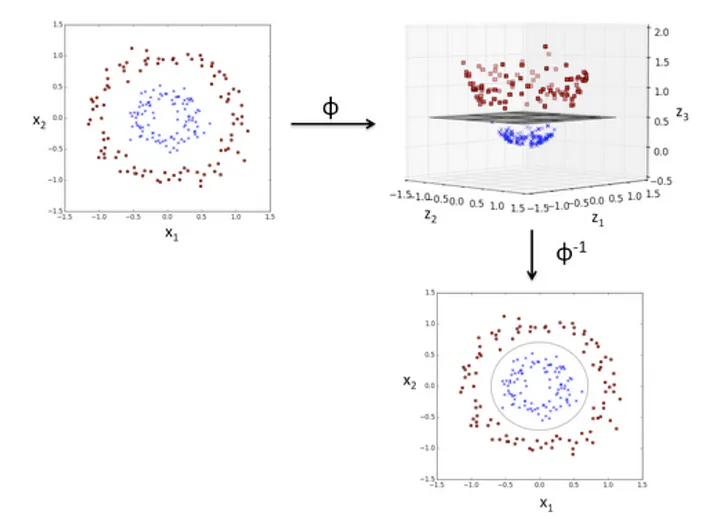

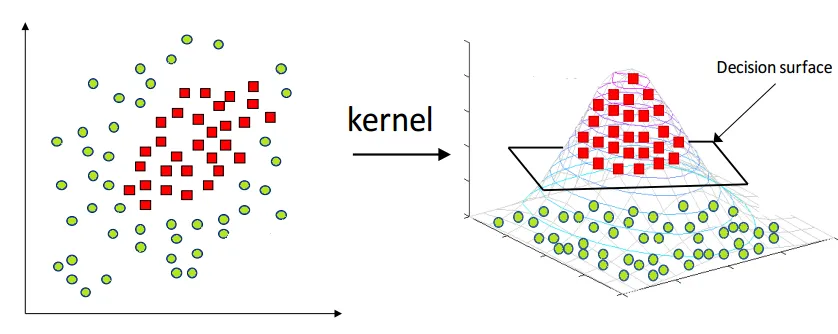

As you can see in the above picture, if we find a way to map the data from 2-dimensional space to 3-dimensional space, we will be able to find a decision surface that clearly divides between different classes. My first thought of this data transformation process is to map all the data point to a higher dimension (in this case, 3 dimension), find the boundary, and make the classification.

That sounds alright. However, when there are more and more dimensions, computations within that space become more and more expensive. This is when the kernel trick comes in. **It allows us to operate in the original feature space without computing the coordinates of the data in a higher dimensional space.**

**RBF Kernel:**

$$ k(x, y) = e^{-\gamma \|x - y\|^2}, \quad \gamma > 0 $$
*The ```γ``` parameter defines how much influence a single training example has. The larger it is, the closer other examples must be to be affected*



**Poly Kernel:**
$$k(x, y) = (x^T y + 1)^d$$

**Linear Kernel:**
$$ k(x, y) = x^T y $$

**Sigmoid Kernel:**
$$ k(x, y) = \tanh(\alpha x^T y + c) $$




https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d#:~:text=When%20talking%20about%20kernels%20in%20machine%20learning,%20most%20likely%20the

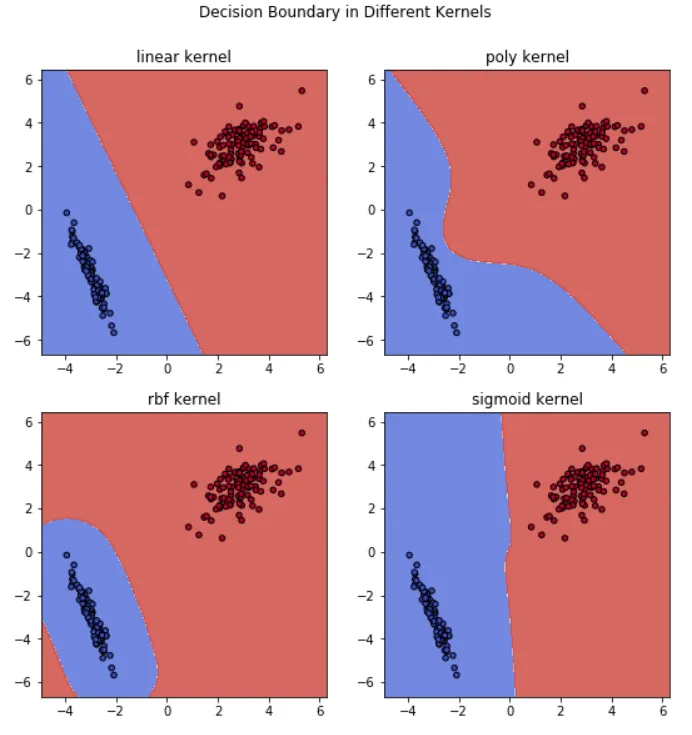


**SVM Parameters and Their Use Cases**

When training an SVM classifier, several hyperparameters influence the model's performance.

Here are the key parameters:

**C (Regularization Parameter):**

*   Controls the trade-off between achieving a low error on training data and minimizing the margin.
*   **High C:** Smaller margin but low bias and high variance (overfitting).
*   **Low C:** Larger margin but might allow some misclassification (underfitting).

**kernel:**

*   Specifies the kernel type to be used in the algorithm.
*   Options: ```'linear', 'poly', 'rbf', 'sigmoid'```.
*   **Use Case:** Choose 'linear' for linearly separable data and 'rbf' for most non-linear problems.

**gamma (Kernel Coefficient):**

*   Defines the influence of a single training example.
*   **High gamma:** Model is more flexible; considers distant points. Captures more complex patterns but might overfit.
*   **Low gamma:** Model is constrained; only considers nearby points. Generalizes better but might miss subtle patterns
*   Only applicable to the ```'rbf'```, ```'poly'```, and ```'sigmoid'``` kernels.

**degree:**

*   Degree of the polynomial kernel function ('poly').
*   Ignored by all other kernels.

**coef0:**

*   Controls the bias in the kernel function.
*   Useful in 'poly' and 'sigmoid' kernels.

**class_weight:**

*   Assigns weights to classes to handle imbalanced datasets.
*   Can be set to 'balanced' or a dictionary mapping classes to weights.

**probability:**

*   If set to True, enables probability estimates for classification.

**max_iter:**

*   Limits the number of iterations for training.
*   Set to -1 for no limit.

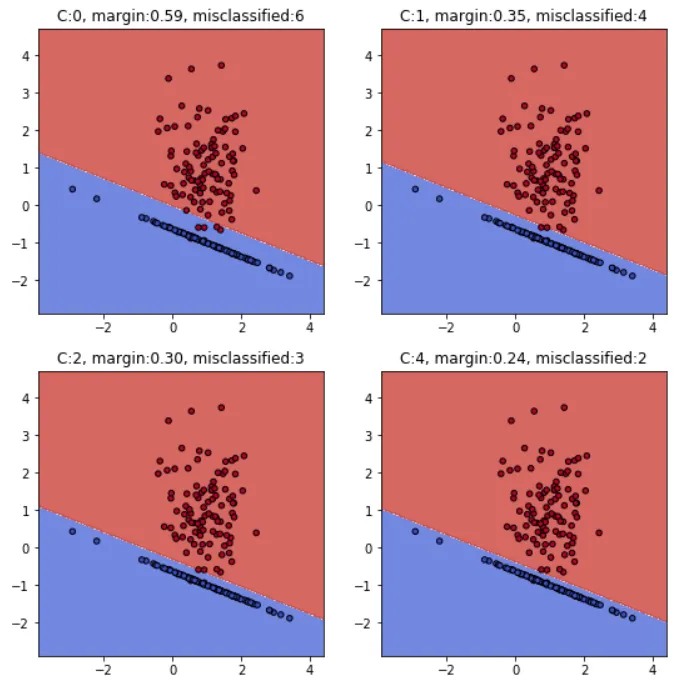

###Model Training

#### Default Execution

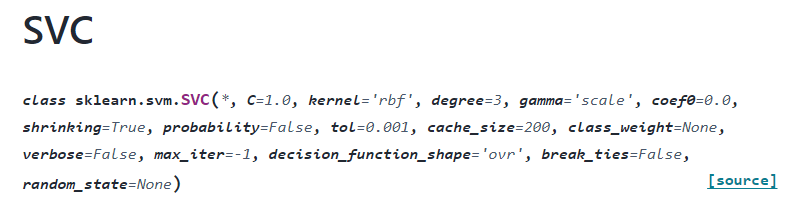

In [158]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target  # All classes (Setosa, Versicolor, Virginica)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Default SVC Parameters:
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



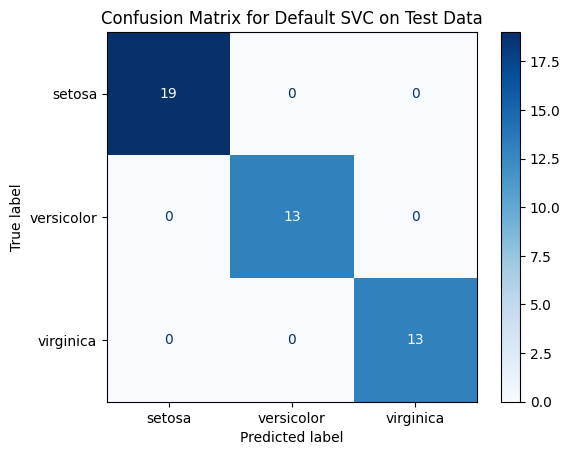

In [159]:
# Initialize SVC with default parameters
svc_default = SVC(random_state=42)  # Default parameters include RBF kernel

# Train the model
svc_default.fit(X_train, y_train)

# Predict on the test set
y_pred_default = svc_default.predict(X_test)

# Calculate evaluation metrics
accuracy_default = accuracy_score(y_test, y_pred_default)
report_default = classification_report(y_test, y_pred_default, target_names=iris.target_names)
conf_matrix_default = confusion_matrix(y_test, y_pred_default)

# Print evaluation metrics
print("Default SVC Parameters:")
print(f"Accuracy: {accuracy_default:.2f}")
print("Classification Report:\n", report_default)

# Plot confusion matrix using ConfusionMatrixDisplay
disp_default = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_default, display_labels=iris.target_names)
disp_default.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Default SVC on Test Data")
plt.show()


#### **Hyper Parameter Tuning**

In [144]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load Iris dataset and select only two features for visualization purposes
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [161]:
# Separate parameter grids for linear kernel and other kernels
param_grid_other = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],  # Gamma only used for RBF
    'kernel': ['rbf','poly', 'sigmoid']  # Only linear kernel, so no gamma parameter
}

param_grid_linear = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear']
}

# Combine both parameter grids into a single grid for GridSearch
param_grid = [param_grid_linear, param_grid_other]

# Initialize SVM model and GridSearch for hyperparameter tuning
svm = SVC(random_state=42)
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=SVC(random_state=42),
             param_grid=[{'C': [0.1, 1, 10, 100], 'kernel': ['linear']},
                         {'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                          'kernel': ['rbf', 'poly', 'sigmoid']}],
             return_train_score=True, scoring='accuracy')

In [162]:
# Retrieve the best parameters and model
best_params = grid_search.best_params_
best_svm = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")

# Extract all combinations and their respective mean cross-validation accuracy scores
results_df = pd.DataFrame(grid_search.cv_results_)

# Display a table with the parameters and corresponding accuracy scores
all_combinations = results_df[['param_C', 'param_gamma', 'param_kernel', 'mean_test_score', 'mean_train_score']]
print("Accuracy for all parameter combinations:")
all_combinations.head(20)

Best Parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy for all parameter combinations:


param_C  param_gamma param_kernel  mean_test_score  mean_train_score
0       0.1          NaN       linear         0.942857          0.959524
1       1.0          NaN       linear         0.961905          0.978571
2      10.0          NaN       linear         0.952381          0.971429
3     100.0          NaN       linear         0.952381          0.978571
4       0.1         0.01          rbf         0.466667          0.519048
5       0.1         0.01         poly         0.419048          0.469048
6       0.1         0.01      sigmoid         0.371429          0.388095
7       0.1         0.10          rbf         0.904762          0.919048
8       0.1         0.10         poly         0.961905          0.980952
9       0.1         0.10      sigmoid         0.295238          0.309524
10      0.1         1.00          rbf         0.942857          0.952381
11      0.1         1.00         poly         0.933333          0.985714
12      0.1         1.00      sigmoid         0.333333          0.357143
13      0.1        10.00          rbf         0.390476          0.419048
14      0.1        10.00         poly         0.942857          1.000000
15      0.1        10.00      sigmoid         0.333333          0.357143
16      1.0         0.01          rbf         0.933333          0.914286
17      1.0         0.01         poly         0.828571          0.833333
18      1.0         0.01      sigmoid         0.666667          0.683333
19      1.0         0.10          rbf         0.952381          0.957143

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



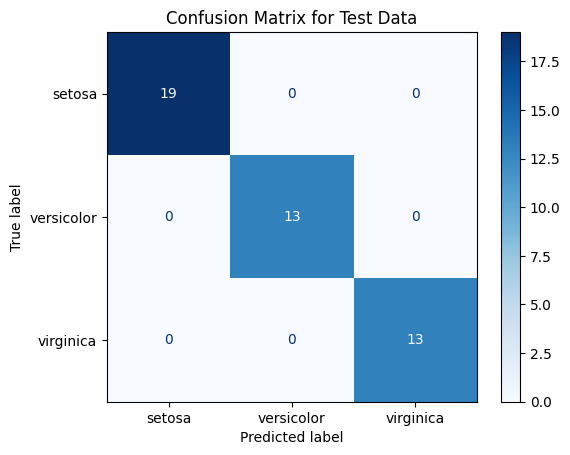

In [163]:
# Train the best model on the training set
best_svm.fit(X_train, y_train)

# Predict on the test set
y_pred = best_svm.predict(X_test)


# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)



# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Test Data")
plt.show()


#### Decision Boundary

##### Binary class

In [166]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load Iris dataset and select only two features for visualization purposes
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D visualization
y = iris.target

# Convert the problem to a binary classification: Setosa (class 0) vs. Others (classes 1 and 2)
y_binary = np.where(y == 0, 0, 1)  # Set Setosa as 0 and all others as 1

# Split the binary class dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.3, random_state=42)

In [167]:

# Initialize SVM models for Linear and RBF kernels
svm_linear = SVC(kernel='linear', C=100,random_state=42)
svm_rbf = SVC(kernel='rbf', C=100, gamma=0.01,random_state=42)

svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

SVC(C=100, gamma=0.01, random_state=42)

### Linear Kernel Model Evaluation ###
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
      Others       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



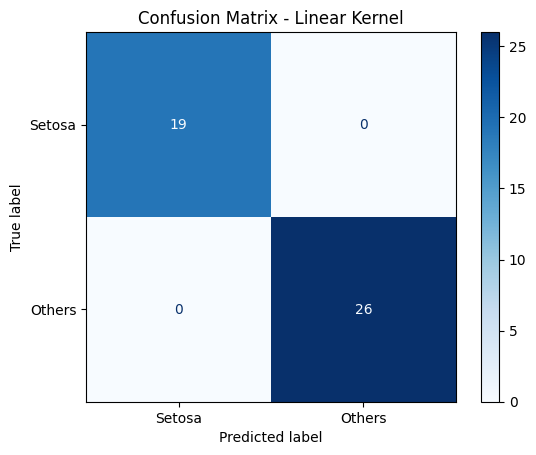

In [168]:
# Calculate and display metrics for the Linear Kernel model
print("### Linear Kernel Model Evaluation ###")
y_pred_linear = svm_linear.predict(X_test)
linear_accuracy = accuracy_score(y_test, y_pred_linear)
linear_report = classification_report(y_test, y_pred_linear, target_names=['Setosa', 'Others'])
linear_conf_matrix = confusion_matrix(y_test, y_pred_linear)

print(f"Accuracy: {linear_accuracy:.2f}")
print("Classification Report:\n", linear_report)

# Plot confusion matrix for Linear Kernel
disp_linear = ConfusionMatrixDisplay(confusion_matrix=linear_conf_matrix, display_labels=['Setosa', 'Others'])
disp_linear.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Linear Kernel")
plt.show()

### RBF Kernel Model Evaluation ###
Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        19
      Others       1.00      1.00      1.00        26

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



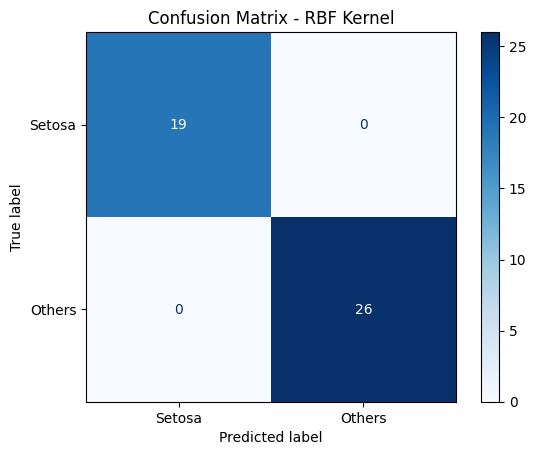

In [169]:
# Calculate and display metrics for the RBF Kernel model
print("### RBF Kernel Model Evaluation ###")
y_pred_rbf = svm_rbf.predict(X_test)
rbf_accuracy = accuracy_score(y_test, y_pred_rbf)
rbf_report = classification_report(y_test, y_pred_rbf, target_names=['Setosa', 'Others'])
rbf_conf_matrix = confusion_matrix(y_test, y_pred_rbf)

print(f"Accuracy: {rbf_accuracy:.2f}")
print("Classification Report:\n", rbf_report)


# Plot confusion matrix for RBF Kernel
disp_rbf = ConfusionMatrixDisplay(confusion_matrix=rbf_conf_matrix, display_labels=['Setosa', 'Others'])
disp_rbf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - RBF Kernel")
plt.show()

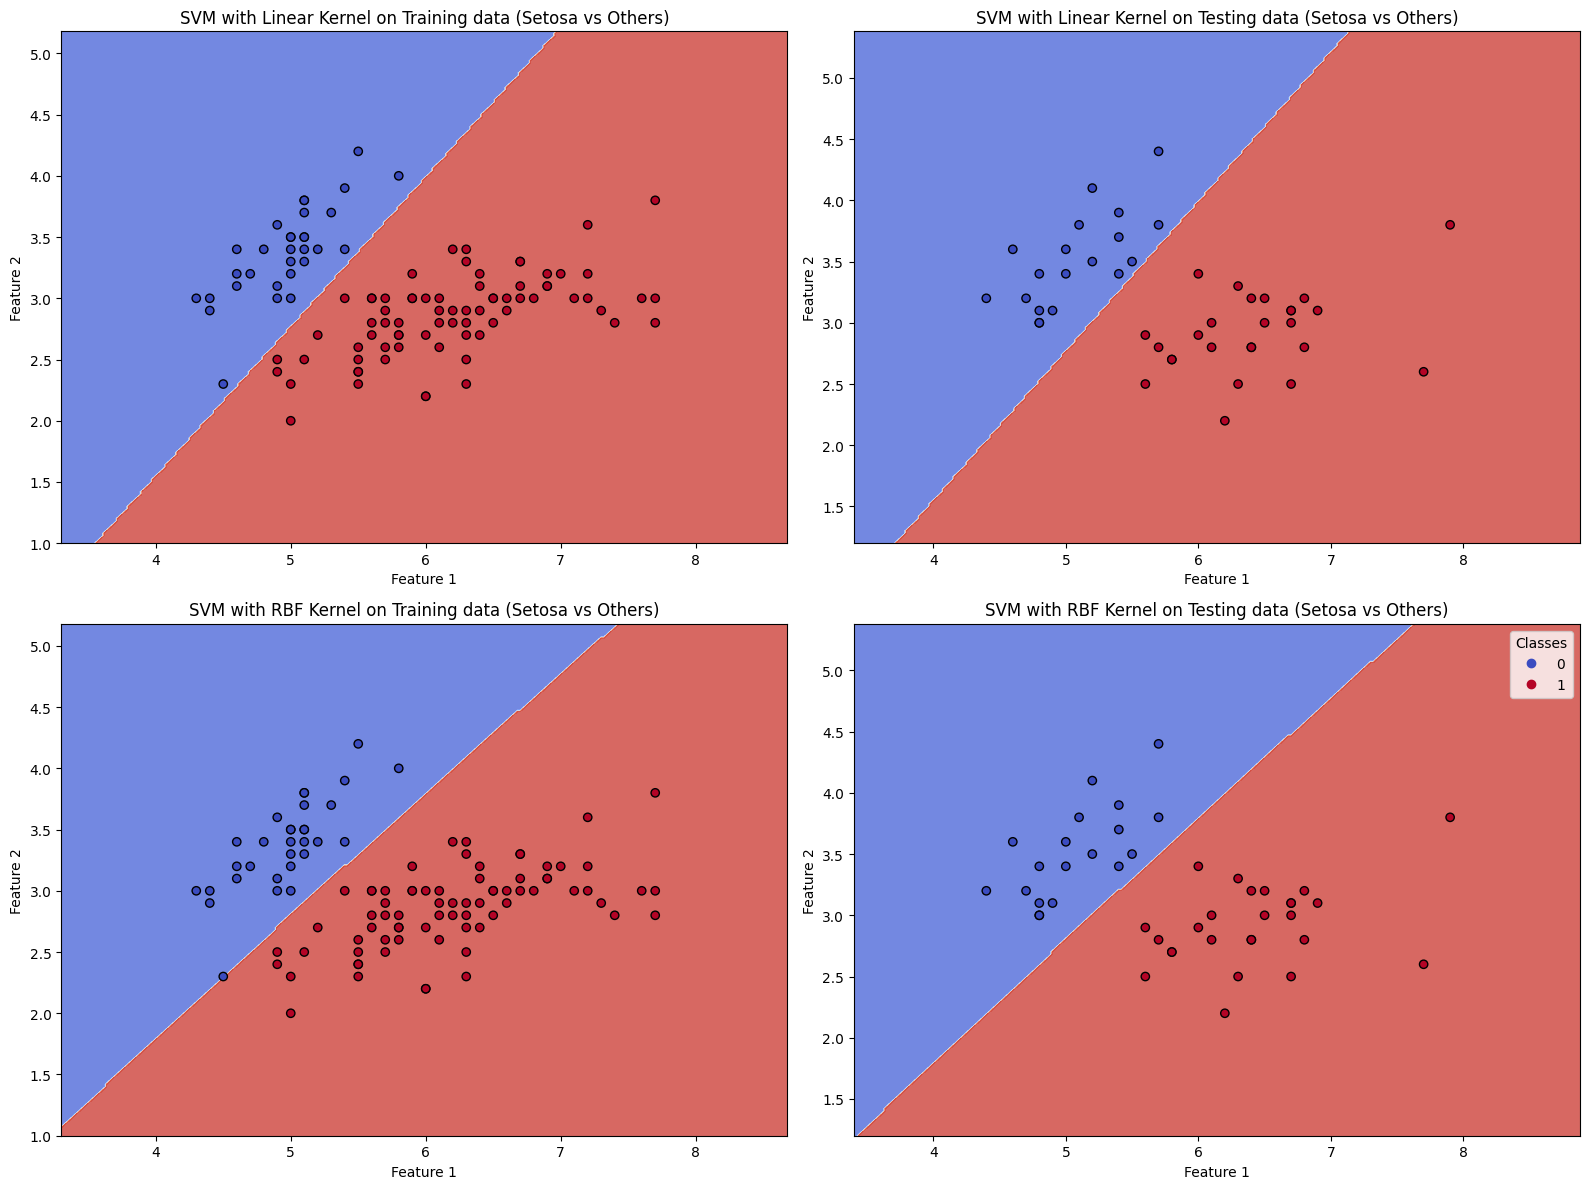

In [170]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title, ax):
    # Define grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict class for each point in the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and training examples
    ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)
    plt.legend(*scatter.legend_elements(), title="Classes")

# Create subplots for both models
fig, ax = plt.subplots(2, 2, figsize=(16, 12))  # Increased figure size for better spacing

# Plot decision boundary for Linear Kernel
plot_decision_boundary(svm_linear, X_train, y_train, title='SVM with Linear Kernel on Training data (Setosa vs Others)', ax=ax[0][0])

plot_decision_boundary(svm_linear, X_test, y_test, title='SVM with Linear Kernel on Testing data (Setosa vs Others)', ax=ax[0][1])

# Plot decision boundary for RBF Kernel
plot_decision_boundary(svm_rbf, X_train, y_train, title='SVM with RBF Kernel on Training data (Setosa vs Others)', ax=ax[1][0])

plot_decision_boundary(svm_rbf, X_test, y_test, title='SVM with RBF Kernel on Testing data (Setosa vs Others)', ax=ax[1][1])

plt.tight_layout()
plt.show()



**Use Case Scenarios:**

**Setting C Value:**
*   For highly imbalanced data, a lower C value might help by allowing the model to be more flexible with misclassified points.

**Choosing Kernel Function:**
*   Use ```'rbf'``` kernel as a starting point when unsure about the data distribution.

**Using class_weight:**
*   For datasets with class imbalance, setting class_weight=```'balanced'``` helps adjust the penalty for misclassifications based on class frequency.

##### Multi class

In [171]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D visualization
y = iris.target  # All classes (Setosa, Versicolor, Virginica)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
# Initialize SVM Classifiers with Linear and RBF kernels
svm_linear = SVC(kernel='linear', C=100,random_state=42)
svm_rbf = SVC(kernel='rbf', C=100, gamma=0.01,random_state=42)

# Train the models
svm_linear.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Predict on the test set
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

# Calculate evaluation metrics for Linear kernel
accuracy_linear = accuracy_score(y_test, y_pred_linear)
report_linear = classification_report(y_test, y_pred_linear, target_names=iris.target_names)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

# Calculate evaluation metrics for RBF kernel
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
report_rbf = classification_report(y_test, y_pred_rbf, target_names=iris.target_names)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

# Print evaluation metrics
print("Linear Kernel:")
print(f"Accuracy: {accuracy_linear:.2f}")
print("Classification Report:\n", report_linear)

print("RBF Kernel:")
print(f"Accuracy: {accuracy_rbf:.2f}")
print("Classification Report:\n", report_rbf)

Linear Kernel:
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.70      0.54      0.61        13
   virginica       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45

RBF Kernel:
Accuracy: 0.80
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.70      0.54      0.61        13
   virginica       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



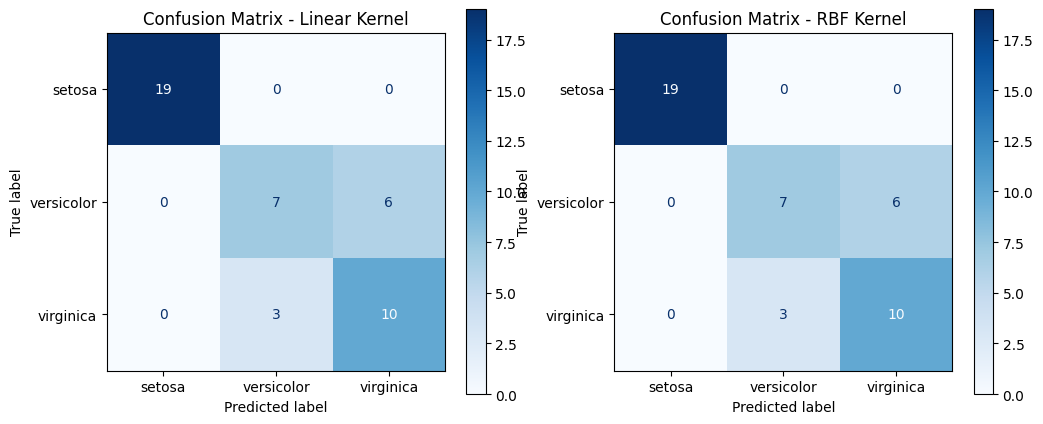

In [173]:
# Plot confusion matrices using ConfusionMatrixDisplay
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

disp_linear = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_linear, display_labels=iris.target_names)
disp_linear.plot(ax=ax[0], cmap=plt.cm.Blues)
ax[0].set_title("Confusion Matrix - Linear Kernel")

disp_rbf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rbf, display_labels=iris.target_names)
disp_rbf.plot(ax=ax[1], cmap=plt.cm.Blues)
ax[1].set_title("Confusion Matrix - RBF Kernel")

plt.show()

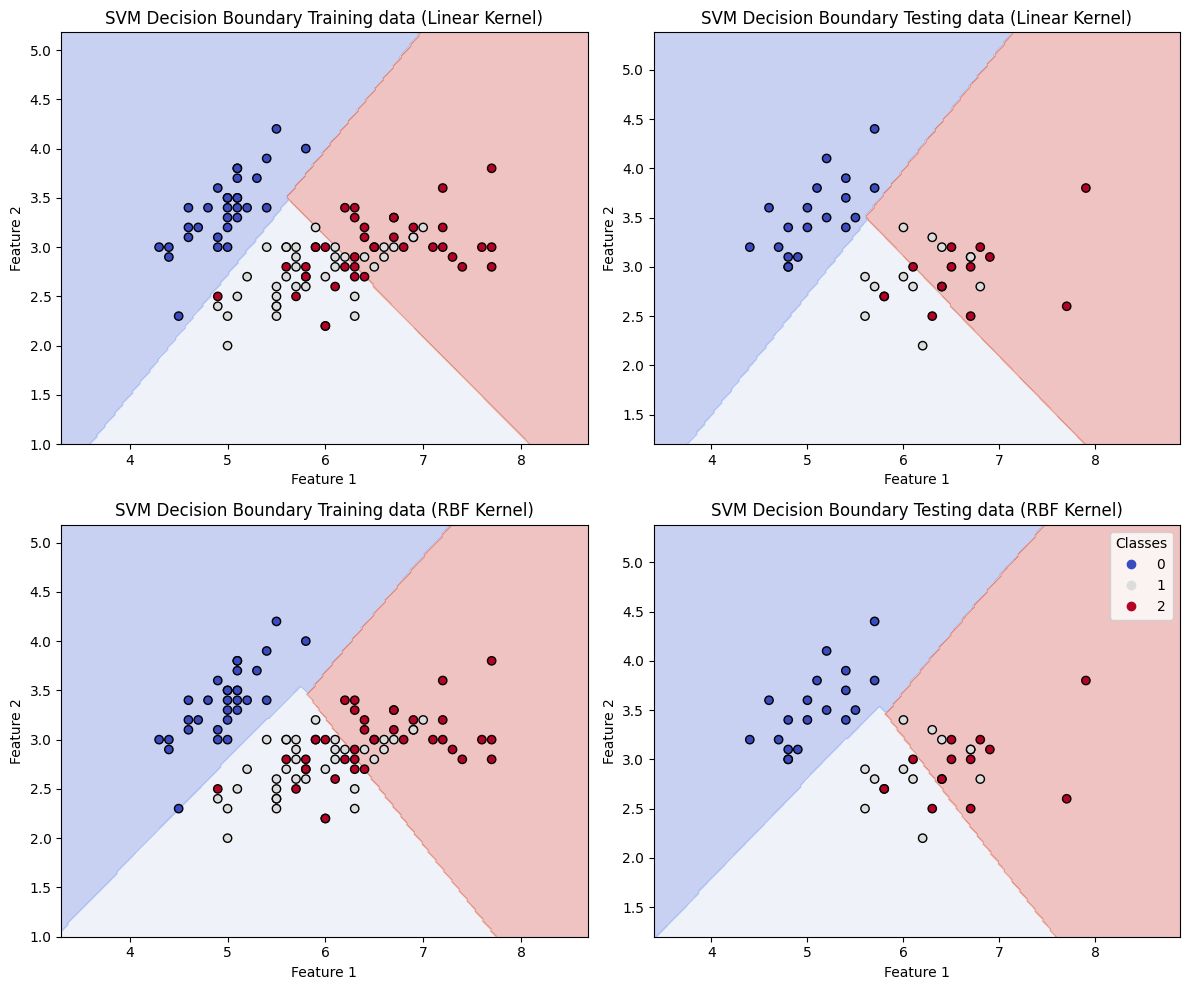

In [174]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, y, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title(title)
    plt.legend(*scatter.legend_elements(), title="Classes")

# Plot decision boundaries for both kernels
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

plot_decision_boundary(svm_linear, X_train, y_train, ax[0][0], title='SVM Decision Boundary Training data (Linear Kernel)')
plot_decision_boundary(svm_linear, X_test, y_test, ax[0][1], title='SVM Decision Boundary Testing data (Linear Kernel)')

plot_decision_boundary(svm_rbf, X_train, y_train, ax[1][0], title='SVM Decision Boundary Training data (RBF Kernel)')
plot_decision_boundary(svm_rbf, X_test, y_test, ax[1][1], title='SVM Decision Boundary Testing data (RBF Kernel)')

plt.tight_layout()
plt.show()


## **Decision Tree**

**Resources**
1. https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

2. https://www.analyticsvidhya.com/decision-tree-algorithm/
3. https://towardsdev.com/machine-learning-algorithms-8-decision-tree-algorithm-533b6926ddbb

4. https://medium.com/analytics-vidhya/entropy-calculation-information-gain-decision-tree-learning-771325d16f

5. https://youtu.be/IZnno-dKgVQ?si=TXPnbdqVkVX3FT41

*A Decision Tree is a flowchart-like structure used for classification and regression tasks. It splits the data based on feature values to make decisions, creating a tree structure with nodes representing feature splits and leaves representing class labels. The goal is to segment the dataset into pure subsets (nodes) where each subset contains data points of mostly one class.*

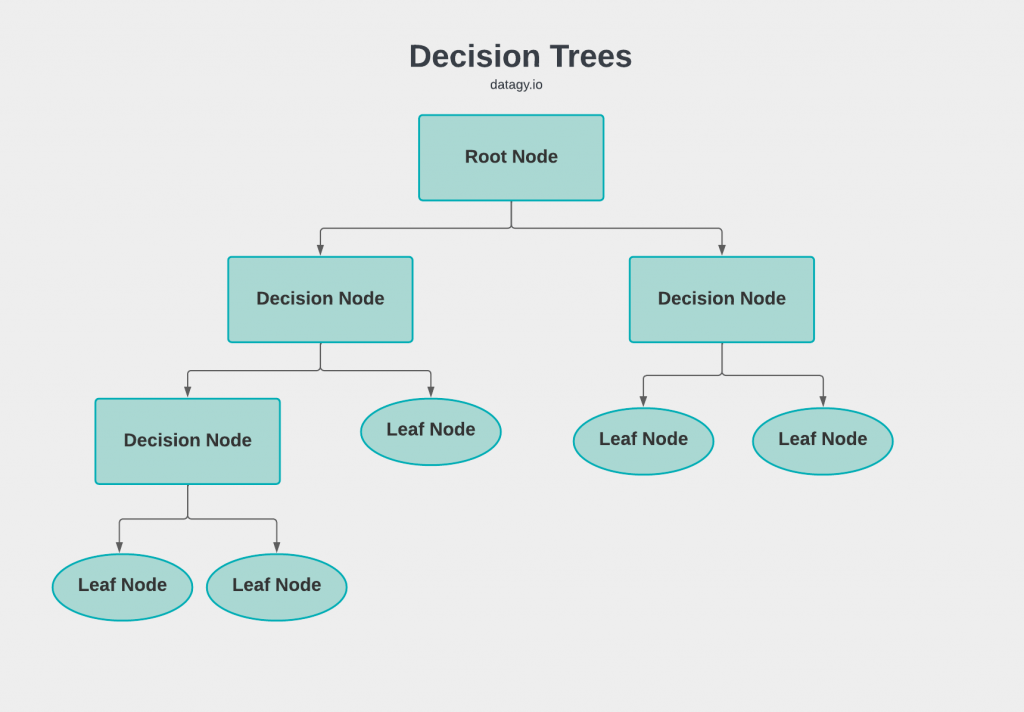

**Key Concepts in Decision Tree Classification:**

**Root Node:**

*   The starting point of the decision tree. It represents the first feature split based on the optimal decision criterion.

**Internal Nodes:**

*   Intermediate nodes that represent additional splits based on feature values, dividing the data into further subsets.

**Leaf Nodes:**

*   The terminal nodes of the tree that represent class labels or output values.

**Decision Criterion:**

*   Determines how the data is split at each node. Common criteria are:

 * **Gini Impurity:** Measures the probability of a randomly chosen element being misclassified.
$$ Gini(t) = 1 - \sum_{i=1}^{n} p_i^2$$

 * **Entropy:** Measures the disorder or uncertainty in the dataset.
$$ Entropy(t) = - \sum_{i=1}^{n} p_i \log_2(p_i)$$

   where $( p_i )$ is the probability of an element being classified into a particular class $(i)$ at node $( t )$.

**Tree Depth:**

*   The number of layers in the tree. Controlling the depth helps prevent overfitting.

**Splitting Strategy:**

*   Trees split on features that maximize the separation of classes.
*   The feature and its value are chosen to minimize impurity or maximize information gain.

**Pruning:**

*   The process of removing unnecessary nodes to reduce overfitting and improve model generalization.

  https://scikit-learn.org/1.5/auto_examples/tree/plot_cost_complexity_pruning.html

**Information Gain**

Information Gain (IG) measures the reduction in entropy or impurity after a dataset is split on an attribute. It is used in decision trees to determine which attribute to split the data on at each step.

The formula for Information Gain is:
$$
IG(T, a) = H(T) - \sum_{v \in Values(a)} \frac{|T_v|}{|T|} H(T_v)
$$
where:
- \( IG(T, a) \) is the Information Gain for attribute \( a \).
- \( H(T) \) is the entropy of the original dataset \( T \).
- \( T_v \) is the subset of \( T \) for which attribute \( a \) has value \( v \).
- \( |T_v| \) is the number of elements in \( T_v \).
- \( |T| \) is the number of elements in \( T \).
- \( H(T_v) \) is the entropy of the subset \( T_v \).

Information Gain helps in selecting the attribute that best separates the data into classes, making it a crucial concept in building decision trees.


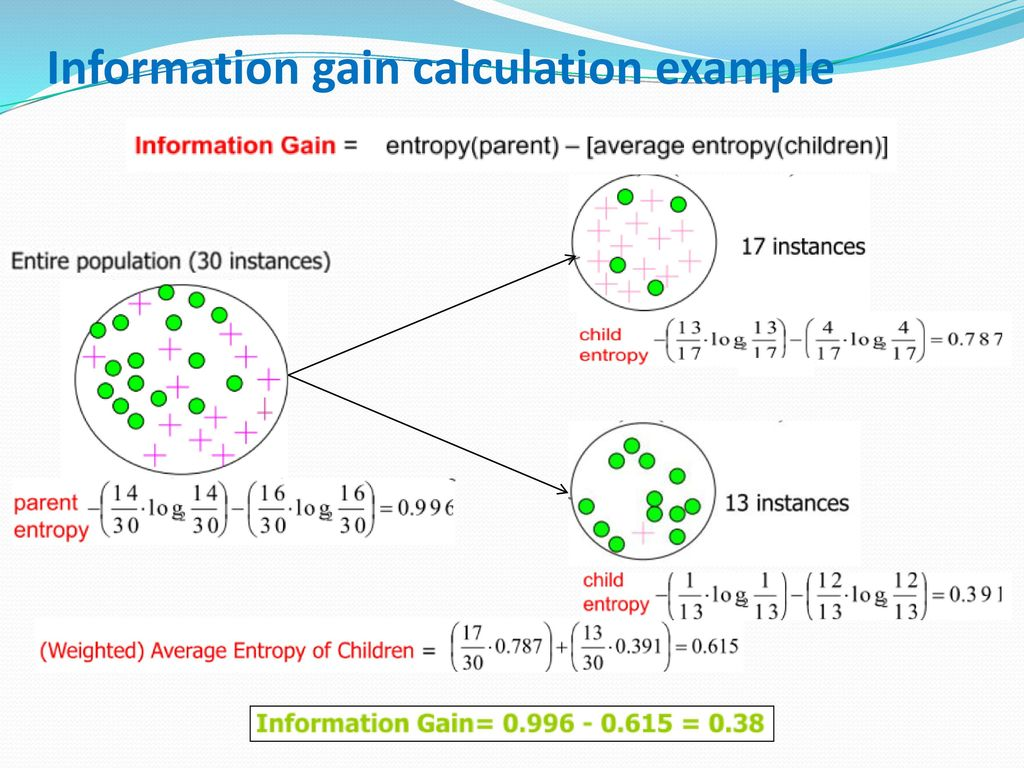



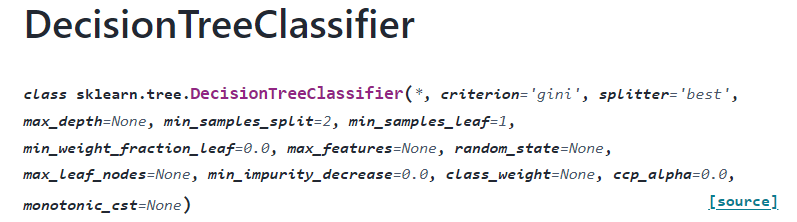

**Parameters for Training a Decision Tree Classifier:**

When training a Decision Tree classifier using Scikit-Learn (```DecisionTreeClassifier```), several hyperparameters can be used to control its complexity and performance:

**criterion:**

*   Specifies the function to measure the quality of a split.
*   Options: ```'gini'``` (default), ```'entropy'```, or ```'log_loss'```.
*   Use Case: ```'gini'``` for classification tasks due to simplicity; ```'entropy'``` when considering probabilistic decision-making.

**splitter:**

*   The strategy used to split nodes.
*   Options: ```'best'``` (default) splits on the best feature; ```'random'``` randomly selects features for splitting.
*   Use Case: Use ```'random'``` for large datasets to reduce computation time.

**max_depth:**

*   The maximum depth of the tree.
*   Use Case: Set a lower depth (e.g., 3-5) to prevent overfitting.

**min_samples_split:**

*   The minimum number of samples required to split an internal node.
*   Use Case: Higher values reduce tree growth, leading to fewer splits.

**min_samples_leaf:**

*   The minimum number of samples required to be at a leaf node.
*   Use Case: Controls the minimum number of samples that a leaf node must have, preventing overfitting.

**max_features:**

*   The maximum number of features considered for splitting.
*   Options: ```'log2'```, ```'sqrt'```,```'None'``` or an integer value.
*   Use Case: Reduce features considered for splits, useful for high-dimensional data.

**random_state:**

*   Seed for randomness. Controls the reproducibility of the model.

**max_leaf_nodes:**

*   The maximum number of leaf nodes.
*   Use Case: Controls the size of the tree, making it less complex.

**class_weight:**

*   Weights associated with classes to handle imbalanced datasets.

**ccp_alpha (Cost-Complexity Pruning):**
*   A pruning parameter that controls the trade-off between complexity and accuracy.

### Model Training

#### Default execution

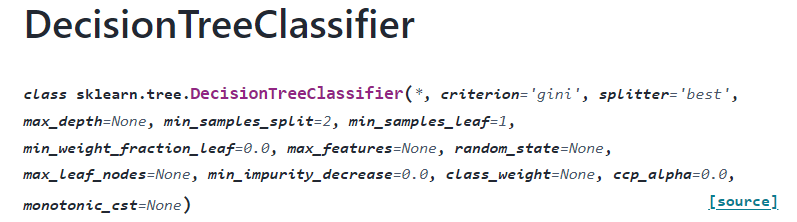

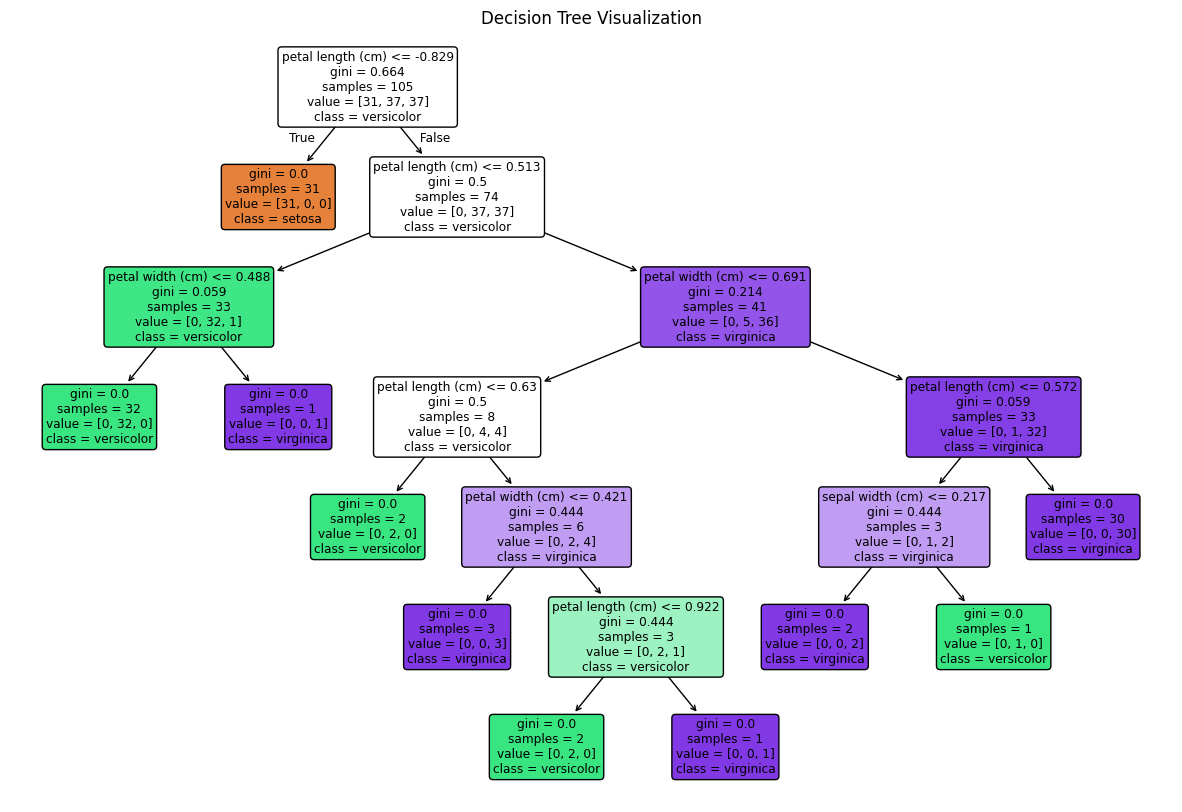

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target  # All three classes

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the Decision Tree classifier
tree_classifier = DecisionTreeClassifier(random_state=42)
tree_classifier.fit(X_train, y_train)

# Visualize the decision tree structure
plt.figure(figsize=(15, 10))
plot_tree(tree_classifier, filled=True, feature_names=iris.feature_names, class_names=iris.target_names, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()


Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-Score: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



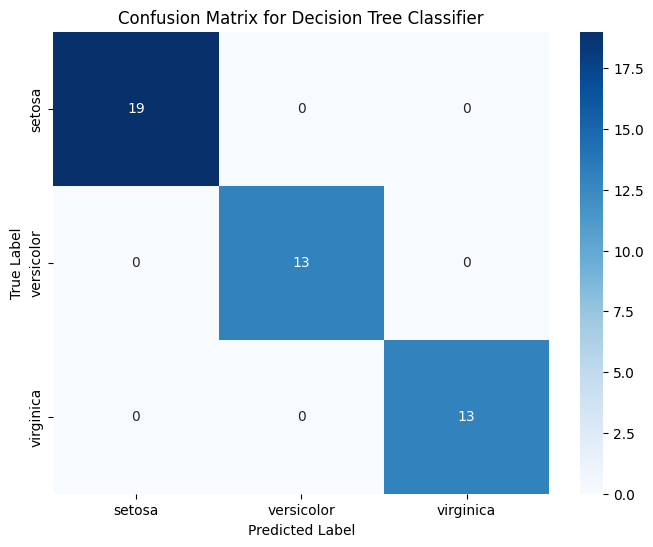

In [133]:
# Make predictions on the test set
y_pred = tree_classifier.predict(X_test)

# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Print Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Create a Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualize Confusion Matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix for Decision Tree Classifier")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()



**Parameter Applications in Real-World Scenarios:**

**max_depth:** Control model complexity; for example, use a shallow tree (```max_depth=3```) to reduce overfitting in small datasets.

**min_samples_split**: Use ```min_samples_split=10``` for noisy datasets to avoid splits that result from anomalies.

**class_weight:** Use ```class_weight='balanced'``` when dealing with imbalanced classes, e.g., in fraud detection where negative samples vastly outnumber positive ones.

**ccp_alpha:** Use for automated pruning, reducing tree complexity dynamically based on data distribution.

#### **Hyper parameter tuning**

In [57]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data  # All features
y = iris.target  # All classes (Setosa, Versicolor, Virginica)

In [58]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'criterion': ['gini', 'entropy'],            # Criterion for splitting: Gini or Entropy
    'max_depth': [None, 2, 4, 6, 8, 10],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],             # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8]          # Minimum number of samples required to be at a leaf node
}

In [59]:
# Initialize DecisionTreeClassifier model and GridSearch for hyperparameter tuning
dt_classifier = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10],
                         'min_samples_leaf': [1, 2, 4, 6, 8],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy')

In [64]:
# Retrieve the best parameters and model
best_params_dt = grid_search_dt.best_params_
best_dt = grid_search_dt.best_estimator_

print(f"Best Parameters for Decision Tree: {best_params_dt}")

# Extract all combinations and their respective mean cross-validation accuracy scores
results_df_dt = pd.DataFrame(grid_search_dt.cv_results_)

# Display a table with the parameters and corresponding accuracy scores
all_combinations_dt = results_df_dt[['param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_score', 'mean_train_score']]
print("Accuracy for all parameter combinations (Decision Tree):")
all_combinations_dt.head(10)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Accuracy for all parameter combinations (Decision Tree):


param_criterion param_max_depth  param_min_samples_split  \
0            gini            None                        2   
1            gini            None                        5   
2            gini            None                       10   
3            gini            None                        2   
4            gini            None                        5   
5            gini            None                       10   
6            gini            None                        2   
7            gini            None                        5   
8            gini            None                       10   
9            gini            None                        2   

   param_min_samples_leaf  mean_test_score  mean_train_score  
0                       1         0.933333          1.000000  
1                       1         0.923810          0.983333  
2                       1         0.942857          0.971429  
3                       2         0.904762          0.976190  
4                       2         0.904762          0.976190  
5                       2         0.933333          0.966667  
6                       4         0.942857          0.964286  
7                       4         0.942857          0.964286  
8                       4         0.942857          0.964286  
9                       6         0.914286          0.952381

Accuracy: 1.00
Classification Report for Decision Tree:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



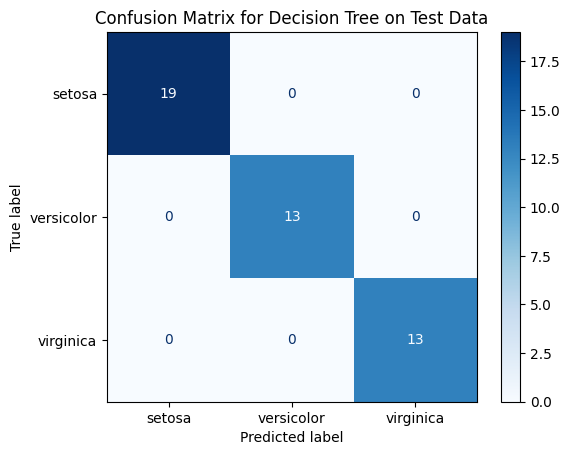

In [65]:
# Train the best model on the training set
best_dt.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = best_dt.predict(X_test)

# Calculate evaluation metrics
accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt, target_names=iris.target_names)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)

print(f"Accuracy: {accuracy_dt:.2f}")
print("Classification Report for Decision Tree:\n", report_dt)


# Plot confusion matrix using ConfusionMatrixDisplay
disp_dt = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_dt, display_labels=iris.target_names)
disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree on Test Data")
plt.show()

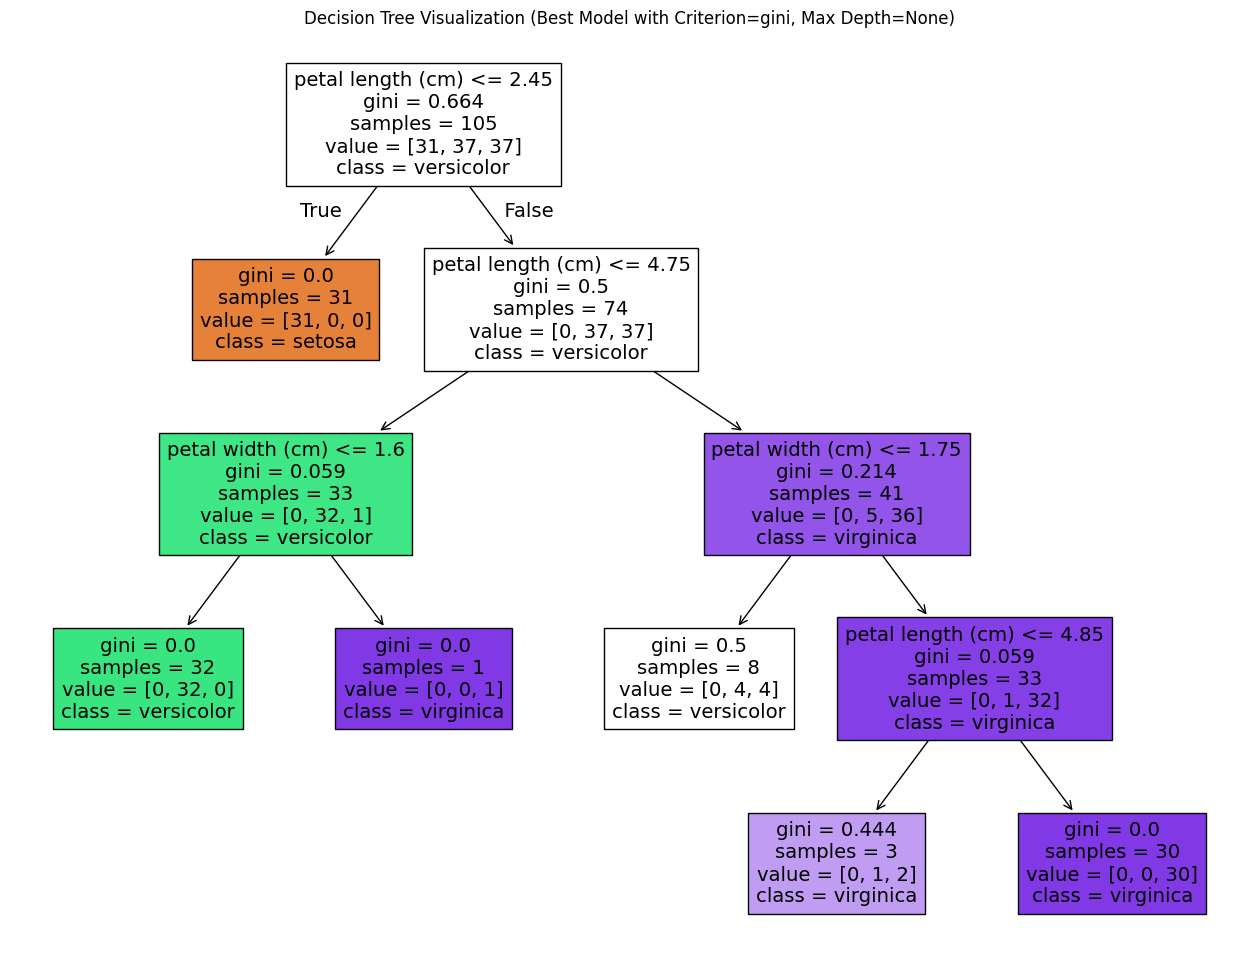

In [66]:
# Visualize the decision tree
fig, ax = plt.subplots(figsize=(16, 12))
plot_tree(best_dt, feature_names=iris.feature_names, class_names=iris.target_names, filled=True, ax=ax)
plt.title(f"Decision Tree Visualization (Best Model with Criterion={best_params_dt['criterion']}, Max Depth={best_params_dt['max_depth']})")
plt.show()




#### Decision Boundary

Accuracy: 0.76
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      0.84      0.91        19
  versicolor       0.58      0.54      0.56        13
   virginica       0.65      0.85      0.73        13

    accuracy                           0.76        45
   macro avg       0.74      0.74      0.74        45
weighted avg       0.78      0.76      0.76        45



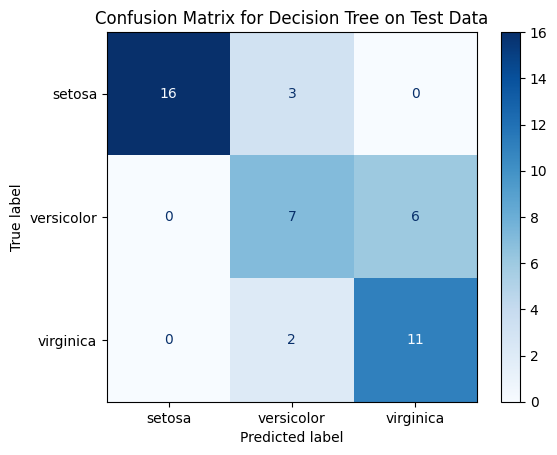

In [138]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for 2D visualization
y = iris.target  # All classes (Setosa, Versicolor, Virginica)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42,min_samples_split=10,min_samples_leaf=1,ccp_alpha=0.056)
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Decision Tree on Test Data")
plt.show()



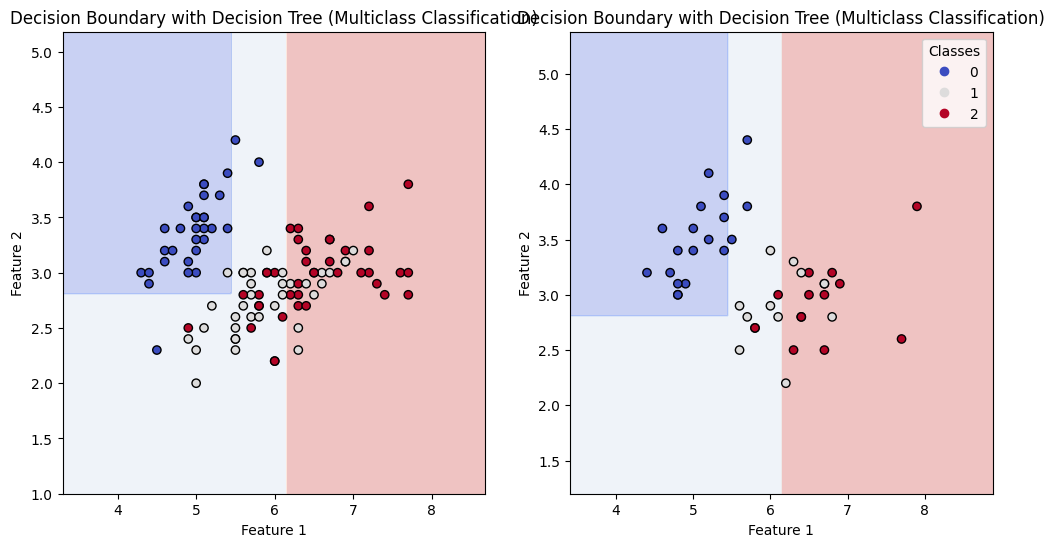

In [139]:

def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Decision Boundary with Decision Tree (Multiclass Classification)')
    plt.legend(*scatter.legend_elements(), title="Classes")

# Plot decision boundary
fig, ax = plt.subplots(1,2,figsize=(12, 6))
plot_decision_boundary(dt_classifier, X_train, y_train, ax[0])
plot_decision_boundary(dt_classifier, X_test, y_test, ax[1])
plt.show()


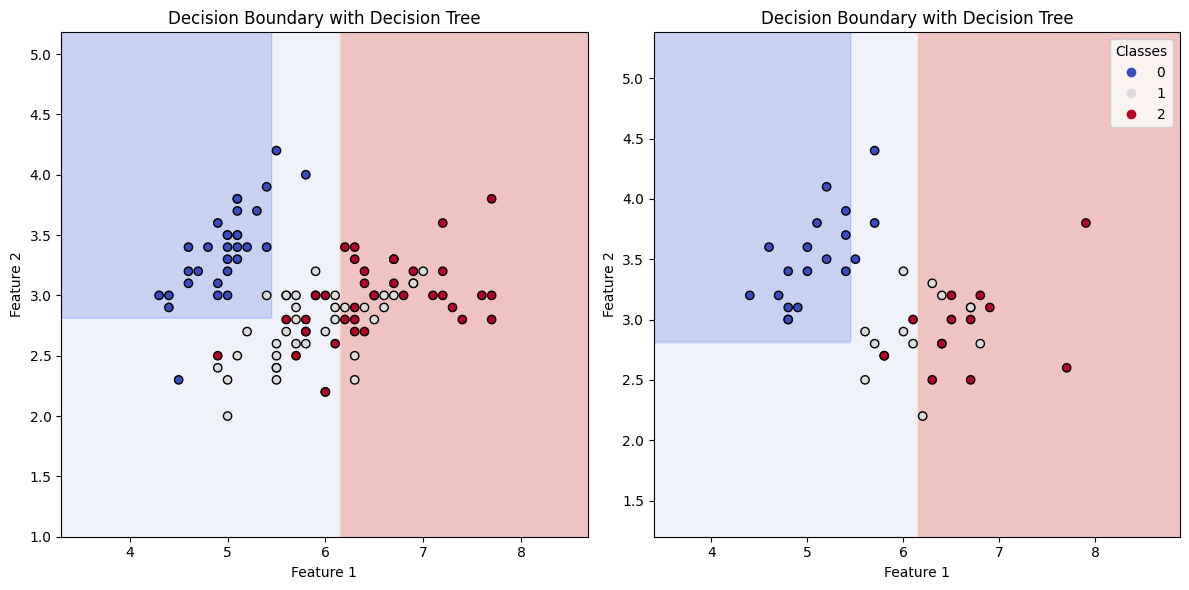

In [140]:
#Post Pruning

def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Decision Boundary with Decision Tree')
    plt.legend(*scatter.legend_elements(), title="Classes")

# Plot decision boundary
fig, ax = plt.subplots(1,2,figsize=(12, 6))
plot_decision_boundary(dt_classifier, X_train, y_train, ax[0])
plot_decision_boundary(dt_classifier, X_test, y_test, ax[1])
plt.tight_layout()
plt.show()

## Random Forest

**Resources**:
1. https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
2. https://www.analyticsvidhya.com/blog/2021/10/an-introduction-to-random-forest-algorithm-for-beginners/#:~:text=Random%20forests%20are%20a%20supervised%20Machine%20learning%20algorithm%20that%20is
3. https://medium.com/towardsdev/machine-learning-algorithms-9-ensemble-techniques-bagging-random-forest-classifier-and-5d3747c7a953


*Random Forest is an ensemble learning method used for classification, regression, and other tasks. It builds multiple decision trees during training and merges them to get a more accurate and stable prediction. Each tree in the forest is trained on a different subset of the data, and their results are combined (voted or averaged) to make the final prediction. This method helps in reducing overfitting and increasing performance.*

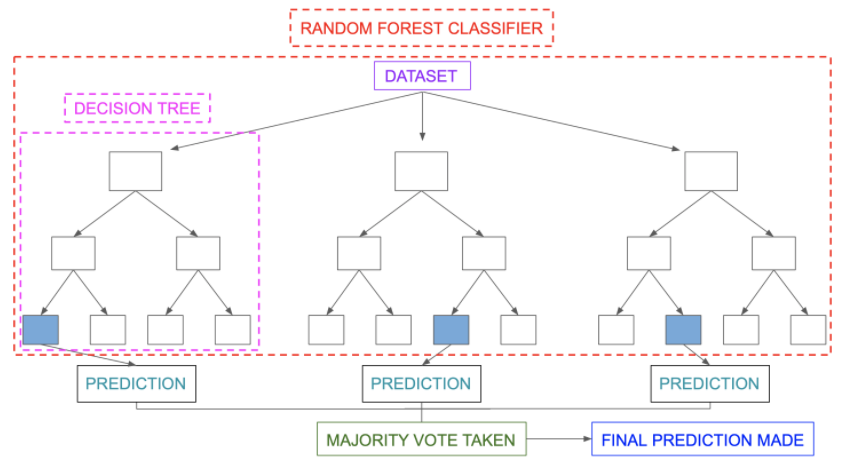

**Key Concepts:**

**Ensemble Learning:**

-  Random Forest is an ensemble of Decision Trees. Each tree is trained on a random subset of the data and with a random subset of features.

**Bagging (Bootstrap Aggregation):**
- Bagging involves training each tree on a random sample of the data with replacement, which helps reduce variance.


**Random Feature Selection:**
- For each node in a tree, a random subset of features is considered to determine the best split. This introduces diversity among trees, reducing correlation between them.

**Majority Voting (Classification):**
- For classification tasks, each tree in the forest votes for a class, and the class with the majority votes is the final output.

**Averaging (Regression):**
- For regression tasks, the average of the outputs from all trees is taken as the final prediction.

**Advantages of Random Forest**

- Handles high-dimensional data effectively.
- Reduces overfitting compared to individual decision trees.
- Robust to noise and missing data.
- Suitable for both classification and regression tasks.

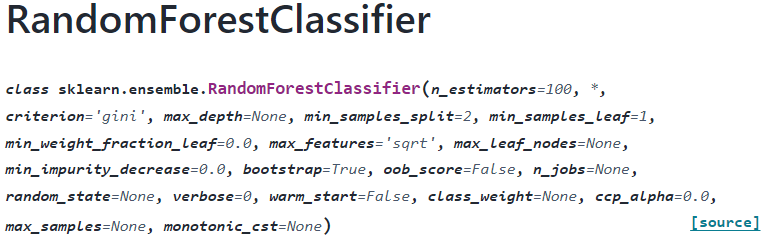


**Parameters Involved in Random Forest Classifier Training**

**n_estimators:**

* Number of trees in the forest.
* Increasing the number of estimators can improve performance but also increase computational time.
* Default value: ```100```

**criterion:**

* Function to measure the quality of a split.
* Options: ```'gini'``` (Gini Impurity), ```'entropy'``` (Information Gain).
* Default value: ```'gini'```

**max_depth:**

* Maximum depth of the individual trees.
* Controls overfitting; lower depth leads to a simpler model.
* Default value: ```None``` (nodes are expanded until all leaves are pure or until they contain fewer than min_samples_split samples)

**min_samples_split:**

* Minimum number of samples required to split an internal node.
* Higher values prevent model overfitting.
* Default value: ```2```

**min_samples_leaf:**

* Minimum number of samples required to be at a leaf node.
* Useful for handling imbalanced datasets.
* Default value: ```1```

**max_features:**

* Number of features to consider when looking for the best split.
* Options: ```'None', 'sqrt', 'log2'``` or a fraction of features.
* Default value: ```'sqrt'```.

**bootstrap:**

* Whether bootstrap samples are used when building trees.
* Default value: ```True```

**oob_score:**

* Whether to use out-of-bag samples to estimate the generalization accuracy.
* Out-of-bag score provides a cross-validation error estimate.
* Default value: ```False```

**n_jobs:**

* Number of jobs to run in parallel for training.
* ```-1``` uses all processors.
* Default value: ```None```

**random_state:**

* Seed used by the random number generator.
* Ensures reproducibility.
* Default value: ```None```

### Model Training

#### Default Execution

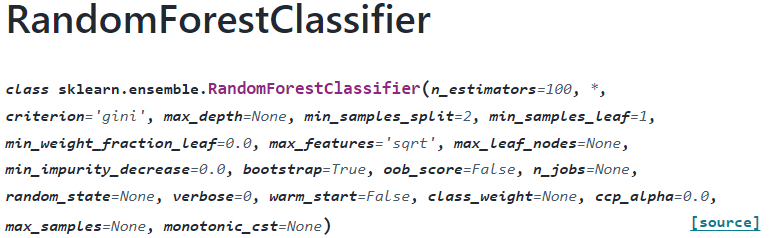

In [134]:
# Step 1: Install Graphviz
!apt-get install -y graphviz
!pip install graphviz



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [135]:
# Step 2: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import graphviz

# Step 3: Load the dataset (Iris Dataset)
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


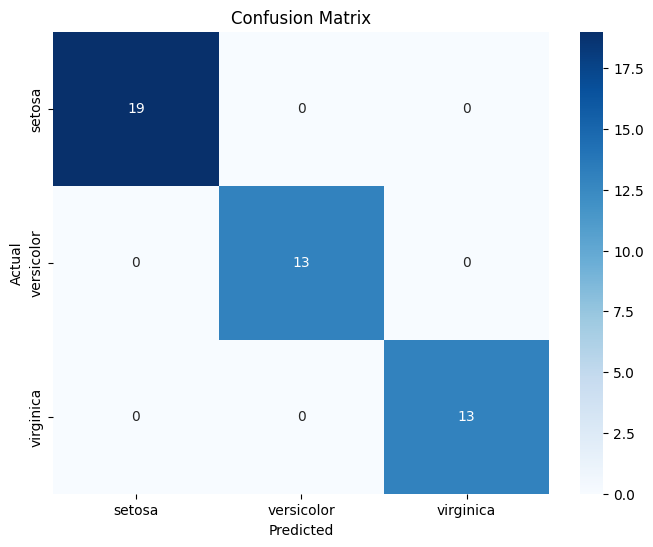

In [136]:
# Step 6: Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 7: Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Step 8: Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

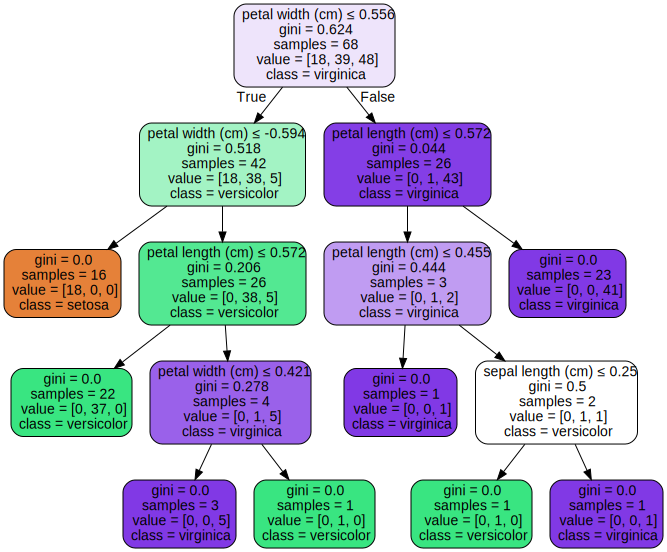

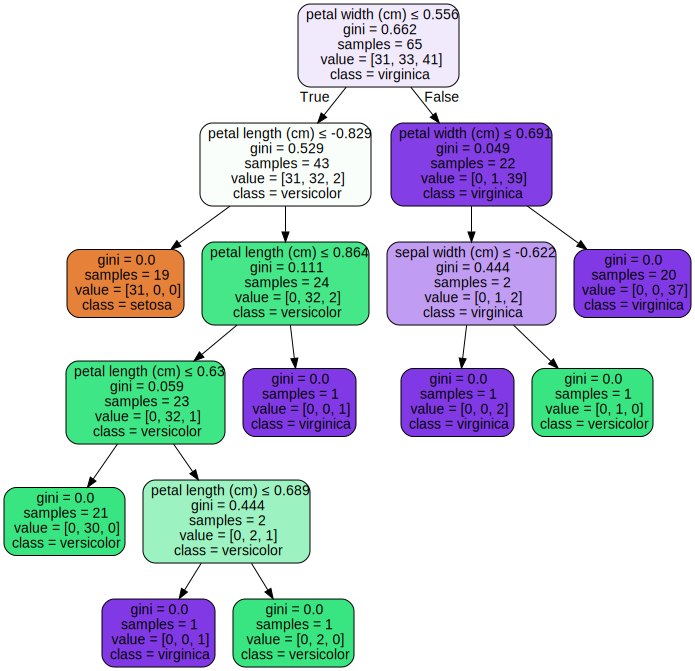

In [137]:
# Step 9: Visualize two decision trees from the random forest
for i in range(2):  # Change the range for more trees
    tree = rf_classifier.estimators_[i]  # Choose the ith tree

    dot_data = export_graphviz(tree, out_file=None,
                               feature_names=iris.feature_names,
                               class_names=iris.target_names,
                               filled=True, rounded=True,
                               special_characters=True)

    graph = graphviz.Source(dot_data)
    display(graph)

#### **Hyper parameter Tuning**

In [77]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data  # All features
y = iris.target  # All classes (Setosa, Versicolor, Virginica)

In [78]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [10, 50, 100, 200],         # Number of trees in the forest
    'max_depth': [None, 2, 4, 6, 8, 10],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],            # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6, 8],        # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                   # Whether bootstrap samples are used when building trees
}


In [79]:
# Initialize RandomForestClassifier model and GridSearch for hyperparameter tuning
rf_classifier = RandomForestClassifier(random_state=42)
grid_search_rf = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search_rf.fit(X_train, y_train)

# Retrieve the best parameters and model
best_params_rf = grid_search_rf.best_params_
best_rf = grid_search_rf.best_estimator_

print(f"Best Parameters for Random Forest: {best_params_rf}")


Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [80]:
# Extract all combinations and their respective mean cross-validation accuracy scores
results_df_rf = pd.DataFrame(grid_search_rf.cv_results_)

# Display a table with the parameters and corresponding accuracy scores
all_combinations_rf = results_df_rf[['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_bootstrap', 'mean_test_score', 'mean_train_score']]
print("Accuracy for all parameter combinations (Random Forest):")
all_combinations_rf.head()

Accuracy for all parameter combinations (Random Forest):


param_n_estimators param_max_depth  param_min_samples_split  \
0                  10            None                        2   
1                  50            None                        2   
2                 100            None                        2   
3                 200            None                        2   
4                  10            None                        5   

   param_min_samples_leaf  param_bootstrap  mean_test_score  mean_train_score  
0                       1             True         0.933333           1.00000  
1                       1             True         0.933333           1.00000  
2                       1             True         0.942857           1.00000  
3                       1             True         0.942857           1.00000  
4                       1             True         0.942857           0.97619

Accuracy: 1.00
Classification Report for Random Forest:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



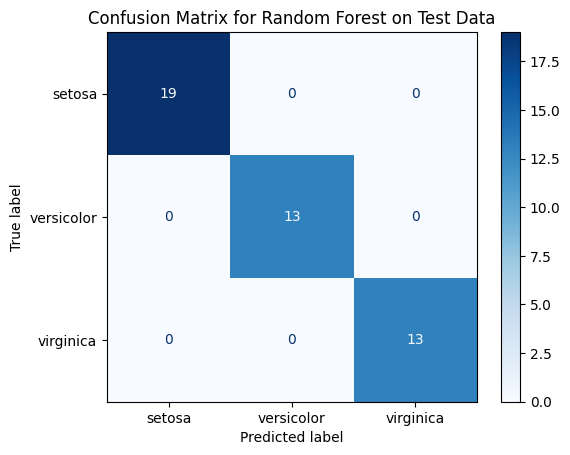

In [81]:
# Train the best model on the training set
best_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = best_rf.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf, target_names=iris.target_names)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy: {accuracy_rf:.2f}")
print("Classification Report for Random Forest:\n", report_rf)

# Plot confusion matrix using ConfusionMatrixDisplay
disp_rf = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_rf, display_labels=iris.target_names)
disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest on Test Data")
plt.show()


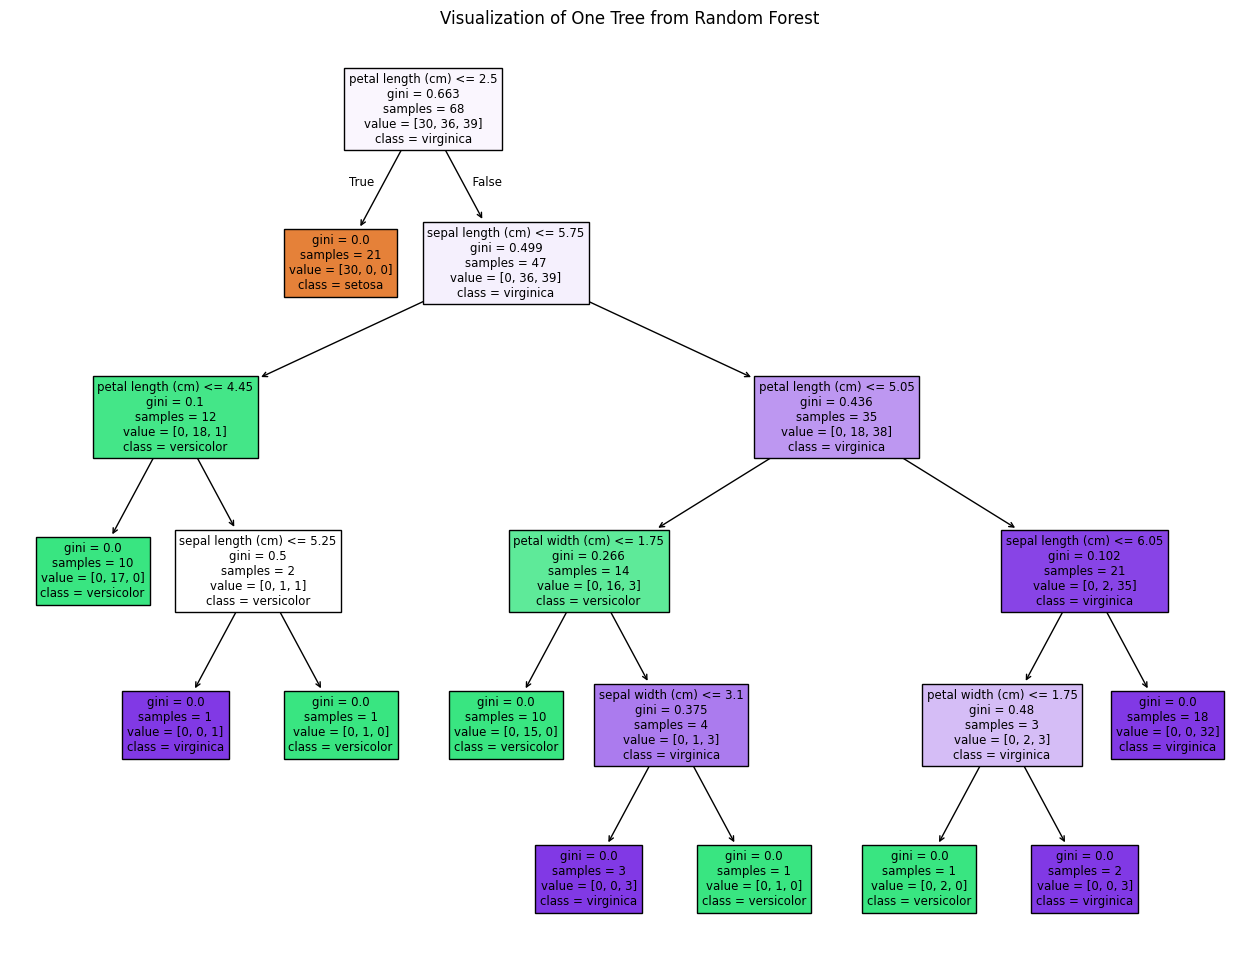

In [83]:
# Visualize one of the trees in the Random Forest
# Select one of the trees from the random forest
tree_to_plot = best_rf.estimators_[3]  # Getting the first tree in the forest

# Plotting the tree
plt.figure(figsize=(16, 12))
plot_tree(tree_to_plot, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.title("Visualization of One Tree from Random Forest")
plt.show()

#### Decision Boundary

In [141]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load Iris dataset
iris = datasets.load_iris()
X = iris.data[:, 2:4]  # Use only the last two features for 2D visualization
y = iris.target  # All classes (Setosa, Versicolor, Virginica)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



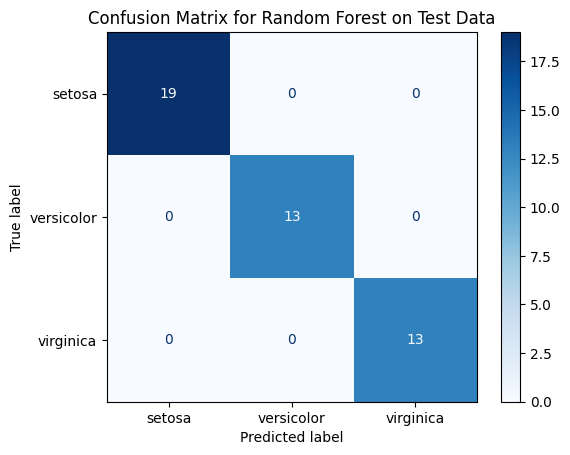

In [142]:
# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

# Plot confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=iris.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest on Test Data")
plt.show()


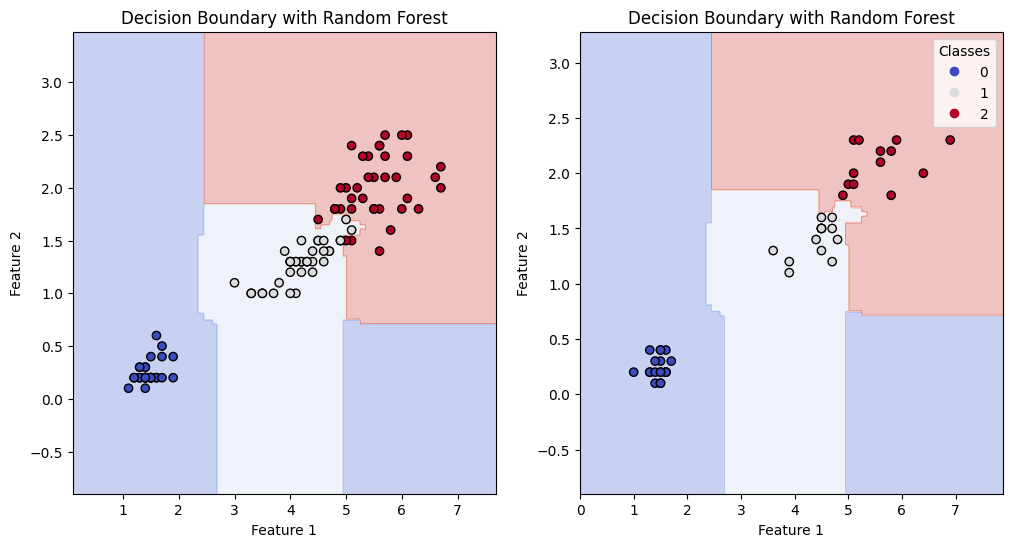

In [143]:

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, ax):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Decision Boundary with Random Forest')
    plt.legend(*scatter.legend_elements(), title="Classes")

# Plot decision boundary
fig, ax = plt.subplots(1,2,figsize=(12, 6))
plot_decision_boundary(rf_classifier, X_train, y_train, ax[0])
plot_decision_boundary(rf_classifier,X_test,y_test,ax[1])
plt.show()